| **Inicio** | **atrás 3** |
|----------- |-------------- |
| [🏠](../../../README.md) | [⏪](./3.ESTIMACION.ipynb)|

# **4. PRUEBAS DE HIPÓTESIS**

## **Sistema de hipótesis**

El sistema de hipótesis es una metodología utilizada en inferencia estadística para realizar pruebas y tomar decisiones sobre afirmaciones o suposiciones acerca de una población o fenómeno. Consiste en formular dos hipótesis: la hipótesis nula (`H0`) y la hipótesis alternativa (`H1`), y luego recopilar evidencia a través de datos para tomar una decisión sobre cuál hipótesis es más probable.

A continuación, te mostraré un ejemplo de cómo realizar un test de hipótesis utilizando Python y gráficas correspondientes:

Supongamos que tenemos una muestra de datos y queremos realizar un test de hipótesis para verificar si la media de la población es igual a un valor específico.

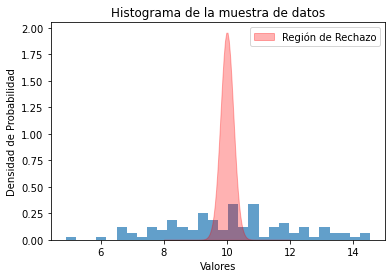

No podemos rechazar la hipótesis nula.
Estadístico de prueba: 0.590428340285171
Valor p: 0.5562489158694666


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generar una muestra de datos
np.random.seed(0)
datos = np.random.normal(loc=10, scale=2, size=100)

# Definir las hipótesis
hipotesis_nula = 10
nivel_significancia = 0.05

# Calcular el estadístico de prueba y el valor p
estadistico_prueba, p_valor = stats.ttest_1samp(datos, hipotesis_nula)

# Graficar el histograma de los datos
plt.hist(datos, bins=30, density=True, alpha=0.7)
plt.xlabel('Valores')
plt.ylabel('Densidad de Probabilidad')
plt.title('Histograma de la muestra de datos')

# Graficar la región de rechazo
x = np.linspace(8, 12, 100)
y = stats.t.pdf(x, len(datos) - 1, loc=hipotesis_nula, scale=stats.sem(datos))
plt.fill_between(x, y, where=(x >= estadistico_prueba), color='red', alpha=0.3, label='Región de Rechazo')

plt.legend()
plt.show()

# Imprimir el resultado del test de hipótesis
if p_valor < nivel_significancia:
    print("Rechazamos la hipótesis nula.")
else:
    print("No podemos rechazar la hipótesis nula.")

print("Estadístico de prueba:", estadistico_prueba)
print("Valor p:", p_valor)

En el código anterior, generamos una muestra de datos utilizando la función `np.random.normal()` que sigue una distribución normal con media 10 y desviación estándar 2.

Luego, definimos la hipótesis nula (`H0`) como la media igual a 10 y especificamos el nivel de significancia deseado, en este caso, 0.05.

Utilizamos la función `stats.ttest_1samp()` para realizar el test de hipótesis y calcular el estadístico de prueba y el valor `p`. El estadístico de prueba se calcula como la diferencia entre la media muestral y la hipótesis nula, dividida por el error estándar de la media muestral.

Graficamos el histograma de los datos y agregamos una región de rechazo en rojo para visualizar la región crítica.

Finalmente, imprimimos el resultado del test de hipótesis. Si el valor `p` es menor que el nivel de significancia, rechazamos la hipótesis nula y concluimos que hay evidencia suficiente para aceptar la hipótesis alternativa. En caso contrario, no podemos rechazar la hipótesis nula.

Es importante tener en cuenta que este es solo un ejemplo básico de un test de hipótesis univariado. Existen diferentes tipos de test de hipótesis y la elección del test adecuado depende de la naturaleza del problema y los datos disponibles. Además, es fundamental interpretar correctamente los resultados y considerar otras variables o factores relevantes en el análisis.

## **Tipos de error, nivel de significación**

En inferencia estadística, es importante comprender los conceptos de los tipos de error y el nivel de significancia. Estos conceptos están relacionados con las pruebas de hipótesis y ayudan a evaluar la validez de las conclusiones obtenidas.

* **Tipos de error:**

**Error tipo I:** También conocido como error de rechazo incorrecto de la hipótesis nula. Ocurre cuando se rechaza la hipótesis nula (H0) cuando en realidad es verdadera. Es decir, se concluye que hay una diferencia o efecto cuando en realidad no lo hay.
**Error tipo II:** También conocido como error de aceptación incorrecta de la hipótesis nula. Ocurre cuando se acepta la hipótesis nula (H0) cuando en realidad es falsa. Es decir, se concluye que no hay diferencia o efecto cuando en realidad sí lo hay.

* **Nivel de significancia:**

El nivel de significancia (α) es una medida utilizada en las pruebas de hipótesis para establecer el umbral de probabilidad de cometer un error tipo I. Es el límite máximo de probabilidad aceptable para rechazar la hipótesis nula cuando en realidad es verdadera. Es comúnmente establecido antes de realizar la prueba y suele ser un valor estándar, como 0.05 o 0.01.

A continuación, te mostraré un ejemplo de cómo calcular los tipos de error y establecer el nivel de significancia en un test de hipótesis utilizando Python y gráficas correspondientes:

Supongamos que queremos realizar un test de hipótesis para comparar las medias de dos poblaciones utilizando una prueba t de Student.

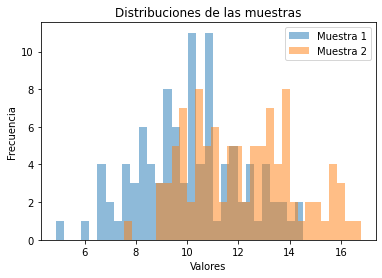

Estadístico de prueba: -7.0414273690132765
Valor p: 3.059820094513985e-11
Rechazamos la hipótesis nula. Hay evidencia de diferencia significativa.


In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generar dos muestras de datos
np.random.seed(0)
muestra1 = np.random.normal(loc=10, scale=2, size=100)
muestra2 = np.random.normal(loc=12, scale=2, size=100)

# Realizar el test de hipótesis
estadistico_prueba, p_valor = stats.ttest_ind(muestra1, muestra2)

# Definir las hipótesis
hipotesis_nula = "Las medias son iguales"
hipotesis_alternativa = "Las medias son diferentes"
nivel_significancia = 0.05

# Graficar las distribuciones de las muestras
plt.hist(muestra1, bins=30, alpha=0.5, label='Muestra 1')
plt.hist(muestra2, bins=30, alpha=0.5, label='Muestra 2')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Distribuciones de las muestras')
plt.legend()
plt.show()

# Imprimir el resultado del test de hipótesis
print("Estadístico de prueba:", estadistico_prueba)
print("Valor p:", p_valor)

# Comparar el valor p con el nivel de significancia
if p_valor < nivel_significancia:
    print("Rechazamos la hipótesis nula. Hay evidencia de diferencia significativa.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente de diferencia significativa.")

En este ejemplo, generamos dos muestras de datos aleatorios utilizando la función `np.random.normal()`. Luego, utilizamos la función `stats.ttest_ind()` de la biblioteca SciPy para realizar el test de hipótesis y obtener el estadístico de prueba y el valor `p`. Establecemos la hipótesis nula y alternativa, así como el nivel de significancia en 0.05. Finalmente, graficamos las distribuciones de las muestras y comparamos el valor `p` con el nivel de significancia para tomar una decisión sobre la hipótesis nula.

Recuerda que el nivel de significancia es una elección del investigador y puede variar según el contexto y la importancia del problema. Además, es fundamental interpretar los resultados de manera adecuada y considerar otros factores relevantes en el análisis.

## **Estadístico de prueba, regla de decisión**

En estadística, el estadístico de prueba y la regla de decisión son conceptos fundamentales en la realización de pruebas de hipótesis. Estos elementos nos ayudan a tomar una decisión sobre la hipótesis nula y la hipótesis alternativa en función de los datos observados.

* **Estadístico de prueba:**

El estadístico de prueba es una medida calculada a partir de los datos observados que se utiliza para evaluar la validez de la hipótesis nula. Este estadístico sigue una distribución conocida bajo la hipótesis nula, lo que nos permite realizar inferencias.

* **Regla de decisión:**

La regla de decisión establece un criterio para tomar una decisión sobre la hipótesis nula basada en el valor del estadístico de prueba y un nivel de significancia predefinido. La regla de decisión establece si se rechaza o no la hipótesis nula en función del valor del estadístico de prueba y compara este valor con un umbral crítico.

A continuación, te mostraré un ejemplo de cómo calcular un estadístico de prueba y aplicar una regla de decisión en un test de hipótesis utilizando Python y gráficas correspondientes:

Supongamos que queremos realizar un test de hipótesis para verificar si la media de una muestra es igual a un valor específico utilizando una prueba t de Student.

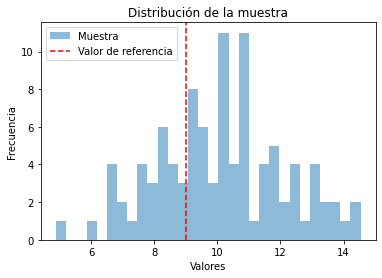

Estadístico de prueba: 5.55429980505218
No podemos rechazar la hipótesis nula. No hay suficiente evidencia para concluir que la media es diferente a 9


In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generar una muestra de datos
np.random.seed(0)
muestra = np.random.normal(loc=10, scale=2, size=100)

# Definir la hipótesis nula y el valor de referencia
hipotesis_nula = "La media es igual a 9"
valor_referencia = 9

# Calcular el estadístico de prueba
media_muestra = np.mean(muestra)
desviacion_muestra = np.std(muestra)
n = len(muestra)
estadistico_prueba = (media_muestra - valor_referencia) / (desviacion_muestra / np.sqrt(n))

# Definir el nivel de significancia
nivel_significancia = 0.05

# Graficar la distribución de la muestra y el valor de referencia
plt.hist(muestra, bins=30, alpha=0.5, label='Muestra')
plt.axvline(x=valor_referencia, color='r', linestyle='--', label='Valor de referencia')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Distribución de la muestra')
plt.legend()
plt.show()

# Imprimir el resultado del test de hipótesis
print("Estadístico de prueba:", estadistico_prueba)

# Realizar la regla de decisión
valor_critico = stats.t.ppf(1 - nivel_significancia, df=n-1)
if estadistico_prueba < valor_critico:
    print("Rechazamos la hipótesis nula. La media es diferente a", valor_referencia)
else:
    print("No podemos rechazar la hipótesis nula. No hay suficiente evidencia para concluir que la media es diferente a", valor_referencia)

En este ejemplo, generamos una muestra de datos aleatorios utilizando la función `np.random.normal()`. Establecemos una hipótesis nula en la que la media de la población es igual a 9. Calculamos el estadístico de prueba dividiendo la diferencia entre la media de la muestra y el valor de referencia por la desviación estándar de la muestra dividida por la raíz cuadrada del tamaño de la muestra. A continuación, establecemos un nivel de significancia del 0.05 y utilizamos la función `stats.t.ppf()` para calcular el valor crítico correspondiente. Finalmente, comparamos el estadístico de prueba con el valor crítico y tomamos una decisión sobre la hipótesis nula.

Es importante tener en cuenta que la regla de decisión y el nivel de significancia son elecciones del investigador y pueden variar según el contexto y la importancia del problema. También es fundamental interpretar los resultados de manera adecuada y considerar otros factores relevantes en el análisis.

## **Relación entre la prueba de hipótesis y el intervalo de confianza**

La prueba de hipótesis y el intervalo de confianza son dos herramientas estadísticas relacionadas que se utilizan para realizar inferencias sobre los parámetros de una población. Aunque tienen propósitos ligeramente diferentes, están estrechamente vinculados y proporcionan información complementaria sobre los resultados de un estudio.

* **Prueba de hipótesis:**

La prueba de hipótesis se utiliza para evaluar la evidencia en contra de una afirmación o hipótesis sobre un parámetro poblacional. La hipótesis nula (`H0`) establece una afirmación inicial que se somete a prueba, mientras que la hipótesis alternativa (`H1`) es la afirmación opuesta. El objetivo es tomar una decisión sobre si rechazar o no la hipótesis nula en función de los datos observados y un nivel de significancia predefinido.

* **Intervalo de confianza:**

El intervalo de confianza es un rango estimado de valores que es probable que contenga el verdadero valor del parámetro poblacional. Se construye utilizando una estimación puntual del parámetro y un margen de error basado en la distribución de la muestra y un nivel de confianza predefinido. El nivel de confianza indica la probabilidad de que el intervalo capture el valor del parámetro.

* **Relación entre prueba de hipótesis e intervalo de confianza:**

El intervalo de confianza y la prueba de hipótesis están relacionados porque se basan en el mismo conjunto de datos y en las mismas suposiciones. En muchos casos, la conclusión de una prueba de hipótesis se puede obtener observando si el valor del parámetro está contenido o no en el intervalo de confianza correspondiente.

A continuación, te mostraré un ejemplo en código Python que ilustra la relación entre la prueba de hipótesis y el intervalo de confianza para la media de una población:

In [4]:
import numpy as np
import scipy.stats as stats

# Generar una muestra de datos
np.random.seed(0)
muestra = np.random.normal(loc=10, scale=2, size=100)

# Realizar una prueba de hipótesis para la media
valor_referencia = 9
nivel_significancia = 0.05
estadistico_prueba, p_valor = stats.ttest_1samp(muestra, valor_referencia)

# Calcular el intervalo de confianza para la media
nivel_confianza = 0.95
media_muestra = np.mean(muestra)
desviacion_muestra = np.std(muestra)
n = len(muestra)
margen_error = stats.t.ppf((1 - nivel_confianza) / 2, df=n-1) * (desviacion_muestra / np.sqrt(n))
intervalo_confianza = (media_muestra - margen_error, media_muestra + margen_error)

# Imprimir los resultados
print("Prueba de hipótesis:")
print("Estadístico de prueba:", estadistico_prueba)
print("Valor p:", p_valor)
if p_valor < nivel_significancia:
    print("Rechazar la hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula")

print("Intervalo de confianza para la media:")
print("Nivel de confianza:", nivel_confianza)
print("Intervalo:", intervalo_confianza)

Prueba de hipótesis:
Estadístico de prueba: 5.526458527950667
Valor p: 2.6513104215810644e-07
Rechazar la hipótesis nula
Intervalo de confianza para la media:
Nivel de confianza: 0.95
Intervalo: (10.519587438087223, 9.719644624050717)


En este ejemplo, primero se realiza una prueba de hipótesis para determinar si la media de la población es igual a un valor de referencia de 9. Luego, se calcula un intervalo de confianza del 95% para la media. Si el valor de referencia no está contenido en el intervalo de confianza, se rechaza la hipótesis nula. De lo contrario, no se puede rechazar la hipótesis nula.

Es importante tener en cuenta que la prueba de hipótesis y el intervalo de confianza proporcionan información diferente y pueden conducir a conclusiones distintas. La prueba de hipótesis se centra en tomar una decisión binaria (rechazar o no rechazar la hipótesis nula), mientras que el intervalo de confianza proporciona una estimación más precisa del rango probable de valores para el parámetro. Sin embargo, ambos enfoques son útiles para comprender la incertidumbre asociada a los resultados de un estudio estadístico.

## **Pruebas sobre la media**

Las pruebas sobre la media son técnicas estadísticas utilizadas para realizar inferencias sobre la media de una población. Estas pruebas nos permiten evaluar si hay evidencia suficiente para rechazar una hipótesis sobre el valor de la media poblacional y llegar a conclusiones sobre una muestra de datos.

A continuación, te explicaré dos pruebas comunes sobre la media: la prueba t de Student y la prueba Z. Además, te mostraré ejemplos de código en Python y las correspondientes gráficas para ilustrar cómo se realizan estas pruebas.

* **Prueba t de Student:**

La prueba t de Student se utiliza cuando la desviación estándar de la población es desconocida. La hipótesis nula (H0) afirma que la media poblacional es igual a un valor específico, mientras que la hipótesis alternativa (H1) sostiene que la media poblacional es diferente de ese valor. La prueba t calcula un estadístico t, que se compara con un valor crítico t para determinar si hay suficiente evidencia para rechazar la hipótesis nula.

**Ejemplo:**

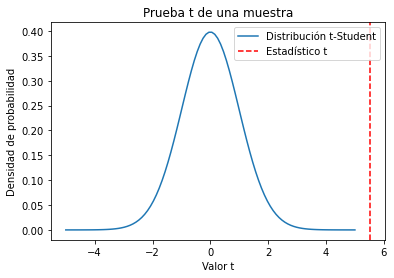

Prueba t de una muestra:
Estadístico t: 5.526458527950667
Valor p: 2.6513104215810644e-07
Rechazar la hipótesis nula


In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generar una muestra de datos
np.random.seed(0)
muestra = np.random.normal(loc=10, scale=2, size=100)

# Realizar una prueba t de una muestra
valor_referencia = 9
estadistico_t, p_valor = stats.ttest_1samp(muestra, valor_referencia)

# Graficar la distribución t-Student
x = np.linspace(-5, 5, 100)
y = stats.t.pdf(x, df=len(muestra)-1)
plt.plot(x, y, label='Distribución t-Student')
plt.axvline(estadistico_t, color='red', linestyle='--', label='Estadístico t')
plt.xlabel('Valor t')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.title('Prueba t de una muestra')
plt.show()

# Imprimir los resultados
print("Prueba t de una muestra:")
print("Estadístico t:", estadistico_t)
print("Valor p:", p_valor)
if p_valor < 0.05:
    print("Rechazar la hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula")

En este ejemplo, se realiza una prueba t de una muestra para determinar si la media de la población es igual a 9. La gráfica muestra la distribución t-Student y el valor del estadístico t calculado a partir de la muestra. Si el valor `p` es menor que un nivel de significancia predefinido (por ejemplo, 0.05), se rechaza la hipótesis nula y se concluye que la media de la población es diferente de 9.

* **Prueba Z:**

La prueba Z se utiliza cuando la desviación estándar de la población es conocida. Al igual que la prueba t, la hipótesis nula (`H0`) afirma que la media poblacional es igual a un valor específico, y la hipótesis alternativa (`H1`) afirma lo contrario. En este caso, se calcula un estadístico `Z`, que se compara con un valor crítico `Z` para determinar si hay suficiente evidencia para rechazar la hipótesis nula.

**Ejemplo:**

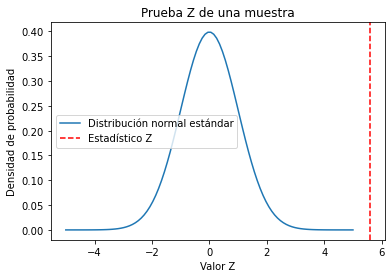

Prueba Z de una muestra:
Estadístico Z: 5.598080155344851
Valor p: 1.0836927244461947e-08
Rechazar la hipótesis nula


In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generar una muestra de datos
np.random.seed(0)
muestra = np.random.normal(loc=10, scale=2, size=100)

# Realizar una prueba Z de una muestra
valor_referencia = 9
media_muestra = np.mean(muestra)
desviacion_estandar_poblacion = 2
estadistico_Z = (media_muestra - valor_referencia) / (desviacion_estandar_poblacion / np.sqrt(len(muestra)))

# Graficar la distribución normal estándar
x = np.linspace(-5, 5, 100)
y = stats.norm.pdf(x, loc=0, scale=1)
plt.plot(x, y, label='Distribución normal estándar')
plt.axvline(estadistico_Z, color='red', linestyle='--', label='Estadístico Z')
plt.xlabel('Valor Z')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.title('Prueba Z de una muestra')
plt.show()

# Imprimir los resultados
print("Prueba Z de una muestra:")
print("Estadístico Z:", estadistico_Z)
p_valor = 1 - stats.norm.cdf(estadistico_Z)
print("Valor p:", p_valor)
if p_valor < 0.05:
    print("Rechazar la hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula")

En este ejemplo, se realiza una prueba `Z` de una muestra para determinar si la media de la población es igual a 9. La gráfica muestra la distribución normal estándar y el valor del estadístico `Z` calculado a partir de la muestra. Se utiliza el método `norm.cdf()` para calcular el valor `p` a partir del estadístico `Z`. Si el valor `p` es menor que un nivel de significancia predefinido (por ejemplo, 0.05), se rechaza la hipótesis nula y se concluye que la media de la población es diferente de 9.

Recuerda que la elección de la prueba estadística depende de las características de los datos y de las suposiciones que se puedan hacer sobre la población. Además, es importante establecer un nivel de significancia adecuado para la toma de decisiones.

## **Prueba sobre la varianza**

Las pruebas sobre la varianza son técnicas estadísticas utilizadas para realizar inferencias sobre la varianza de una población. Estas pruebas nos permiten evaluar si hay evidencia suficiente para rechazar una hipótesis sobre el valor de la varianza poblacional y llegar a conclusiones sobre una muestra de datos.

A continuación, te explicaré dos pruebas comunes sobre la varianza: la prueba de Chi-cuadrado y la prueba de Bartlett. Además, te mostraré ejemplos de código en Python y las correspondientes gráficas para ilustrar cómo se realizan estas pruebas.

1. **Prueba de Chi-cuadrado:**

La prueba de Chi-cuadrado se utiliza cuando se quiere evaluar si la varianza de una población es igual a un valor específico. La hipótesis nula (`H0`) afirma que la varianza poblacional es igual al valor especificado, mientras que la hipótesis alternativa (`H1`) sostiene que la varianza poblacional es diferente de ese valor. La prueba de Chi-cuadrado calcula un estadístico de prueba chi-cuadrado, que se compara con un valor crítico chi-cuadrado para determinar si hay suficiente evidencia para rechazar la hipótesis nula.

**Ejemplo:**

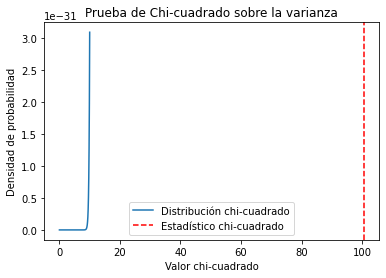

Prueba de Chi-cuadrado sobre la varianza:
Estadístico chi-cuadrado: 100.5668353022782
Valor p: 0.43718632720673944
No se puede rechazar la hipótesis nula


In [12]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generar una muestra de datos
np.random.seed(0)
muestra = np.random.normal(loc=10, scale=2, size=100)

# Calcular la varianza muestral
varianza_muestral = np.var(muestra)

# Realizar una prueba de Chi-cuadrado sobre la varianza
valor_referencia = 4
estadistico_chi2 = (len(muestra) - 1) * varianza_muestral / valor_referencia
p_valor = 1 - stats.chi2.cdf(estadistico_chi2, df=len(muestra)-1)

# Graficar la distribución chi-cuadrado
x = np.linspace(0, 10, 100)
y = stats.chi2.pdf(x, df=len(muestra)-1)
plt.plot(x, y, label='Distribución chi-cuadrado')
plt.axvline(estadistico_chi2, color='red', linestyle='--', label='Estadístico chi-cuadrado')
plt.xlabel('Valor chi-cuadrado')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.title('Prueba de Chi-cuadrado sobre la varianza')
plt.show()

# Imprimir los resultados
print("Prueba de Chi-cuadrado sobre la varianza:")
print("Estadístico chi-cuadrado:", estadistico_chi2)
print("Valor p:", p_valor)
if p_valor < 0.05:
    print("Rechazar la hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula")

En este ejemplo, se realiza una prueba de Chi-cuadrado sobre la varianza para determinar si la varianza de la población es igual a 4. La gráfica muestra la distribución chi-cuadrado y el valor del estadístico chi-cuadrado calculado a partir de la muestra. Si el valor `p` es menor que un nivel de significancia predefinido (por ejemplo, 0.05), se rechaza la hipótesis nula y se concluye que la varianza de la población es diferente de 4.

2. **Prueba de Bartlett:**

La prueba de Bartlett se utiliza cuando se quiere comparar la varianza de dos o más poblaciones. La hipótesis nula (`H0`) afirma que las varianzas de todas las poblaciones son iguales, mientras que la hipótesis alternativa (`H1`) sostiene que al menos una de las varianzas es diferente. La prueba de Bartlett calcula un estadístico de prueba basado en una distribución chi-cuadrado, que se compara con un valor crítico para determinar si hay suficiente evidencia para rechazar la hipótesis nula.

**Ejemplo:**

In [8]:
import numpy as np
import scipy.stats as stats

# Generar muestras de datos
np.random.seed(0)
muestra1 = np.random.normal(loc=10, scale=2, size=100)
muestra2 = np.random.normal(loc=12, scale=2, size=100)
muestra3 = np.random.normal(loc=15, scale=2, size=100)

# Realizar una prueba de Bartlett sobre las varianzas
muestras = [muestra1, muestra2, muestra3]
estadistico_bartlett, p_valor = stats.bartlett(*muestras)

# Imprimir los resultados
print("Prueba de Bartlett sobre las varianzas:")
print("Estadístico Bartlett:", estadistico_bartlett)
print("Valor p:", p_valor)
if p_valor < 0.05:
    print("Rechazar la hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula")

Prueba de Bartlett sobre las varianzas:
Estadístico Bartlett: 0.7071967619133817
Valor p: 0.7021569103213483
No se puede rechazar la hipótesis nula


En este ejemplo, se realiza una prueba de Bartlett sobre las varianzas de tres poblaciones diferentes. Se generan tres muestras de datos, y luego se utiliza la función `bartlett()` para calcular el estadístico de prueba y el valor `p`. Si el valor `p` es menor que un nivel de significancia predefinido (por ejemplo, 0.05), se rechaza la hipótesis nula y se concluye que al menos una de las varianzas es diferente.

Recuerda que al realizar pruebas sobre la varianza, es importante considerar las suposiciones de normalidad y la independencia de los datos. Además, es necesario establecer un nivel de significancia adecuado para la toma de decisiones.

## **Prueba de la diferencia de medias**

La prueba de la diferencia de medias es una técnica estadística que se utiliza para determinar si hay una diferencia significativa entre las medias de dos muestras o poblaciones diferentes. Esta prueba es adecuada cuando queremos comparar dos grupos independientes y determinar si las diferencias observadas en las medias de las muestras son estadísticamente significativas.

El procedimiento general para realizar una prueba de la diferencia de medias es el siguiente:

1. **Planteamiento de hipótesis:**

* **Hipótesis nula (H0):** No hay diferencia significativa entre las medias de los dos grupos.
* **Hipótesis alternativa (H1):** Hay una diferencia significativa entre las medias de los dos grupos.

2. **Selección del nivel de significancia (alfa):** Es el umbral que utilizaremos para determinar si rechazamos la hipótesis nula. Comúnmente se utiliza un nivel de alfa de 0.05, lo que significa que estamos dispuestos a aceptar un 5% de probabilidad de cometer un error de tipo I al rechazar la hipótesis nula cuando es verdadera.

3. **Cálculo del estadístico de prueba:** El estadístico de prueba utilizado en la prueba de la diferencia de medias depende del tamaño de las muestras y de si se asumen varianzas iguales o varianzas diferentes en los dos grupos. Los estadísticos de prueba comunes incluyen la prueba t de Student y la prueba t de Welch.

4. **Cálculo del valor p:** El valor `p` es la probabilidad de obtener el estadístico de prueba observado o uno más extremo si la hipótesis nula es verdadera. Se compara el valor `p` con el nivel de significancia (alfa) y se toma una decisión.

5. **Toma de decisión:** Si el valor `p` es menor que el nivel de significancia (alfa), se rechaza la hipótesis nula y se concluye que hay una diferencia significativa entre las medias de los dos grupos. Si el valor `p` es mayor que el nivel de significancia, no se rechaza la hipótesis nula y no se encuentra evidencia suficiente para afirmar que hay una diferencia significativa entre las medias de los dos grupos.

Aquí tienes un ejemplo de cómo realizar una prueba de la diferencia de medias en Python utilizando la prueba t de Student para dos muestras independientes:

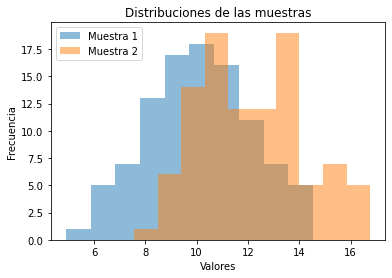

Prueba de la diferencia de medias:
Estadístico t: -7.0414273690132765
Valor p: 3.059820094513985e-11
Rechazar la hipótesis nula


In [13]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generar dos muestras de datos
np.random.seed(0)
muestra1 = np.random.normal(loc=10, scale=2, size=100)
muestra2 = np.random.normal(loc=12, scale=2, size=100)

# Realizar la prueba de la diferencia de medias (prueba t de Student)
estadistico_t, p_valor = stats.ttest_ind(muestra1, muestra2)

# Graficar las distribuciones de las dos muestras
plt.hist(muestra1, alpha=0.5, label='Muestra 1')
plt.hist(muestra2, alpha=0.5, label='Muestra 2')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Distribuciones de las muestras')
plt.show()

# Imprimir los resultados
print("Prueba de la diferencia de medias:")
print("Estadístico t:", estadistico_t)
print("Valor p:", p_valor)
if p_valor < 0.05:
    print("Rechazar la hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula")

En este ejemplo, generamos dos muestras de datos utilizando la función `np.random.normal()`. Luego, utilizamos la función `stats.ttest_ind()` para realizar la prueba de la diferencia de medias utilizando la prueba t de Student. Esta función devuelve el estadístico t y el valor `p`.

Graficamos las distribuciones de las dos muestras utilizando el histograma. Finalmente, imprimimos los resultados y tomamos una decisión basada en el valor `p`.

Recuerda que la prueba de la diferencia de medias puede tener variantes dependiendo de las suposiciones sobre las varianzas de las muestras y del tamaño de las muestras. El ejemplo anterior asume varianzas iguales y dos muestras de igual tamaño. Si las suposiciones no se cumplen, se puede utilizar la prueba t de Welch `(stats.ttest_ind(..., equal_var=False))` o considerar otras técnicas estadísticas más apropiadas.

## **Prueba de independencia Chi-cuadrado**

La prueba de independencia chi-cuadrado es una técnica estadística utilizada para determinar si existe una relación significativa entre dos variables categóricas. Es especialmente útil cuando se quiere investigar si la frecuencia de aparición de ciertas categorías en una variable depende de las categorías de otra variable. Esta prueba se basa en la comparación entre las frecuencias observadas y las frecuencias esperadas bajo la hipótesis de independencia.

El procedimiento general para realizar una prueba de independencia chi-cuadrado es el siguiente:

1. **Planteamiento de hipótesis:**

* **Hipótesis nula (H0):** No hay relación entre las dos variables; son independientes.
* **Hipótesis alternativa (H1):** Existe una relación entre las dos variables; no son independientes.

2. **Selección del nivel de significancia (alfa):**

 Es el umbral que utilizaremos para determinar si rechazamos la hipótesis nula. Comúnmente se utiliza un nivel de alfa de 0.05, lo que significa que estamos dispuestos a aceptar un 5% de probabilidad de cometer un error de tipo I al rechazar la hipótesis nula cuando es verdadera.

3. **Construcción de la tabla de contingencia:**

 Se crea una tabla que muestra las frecuencias observadas para cada combinación de categorías entre las dos variables. Esta tabla se utiliza para calcular las frecuencias esperadas bajo la hipótesis de independencia.

4. **Cálculo del estadístico de prueba chi-cuadrado:**

 Se calcula el estadístico de prueba chi-cuadrado a partir de las frecuencias observadas y esperadas. El estadístico mide la discrepancia entre las frecuencias observadas y las esperadas bajo la hipótesis nula.

5. **Cálculo del valor p:**

 Se utiliza el estadístico de prueba para calcular el valor p, que es la probabilidad de obtener un estadístico chi-cuadrado igual o más extremo que el observado, bajo la hipótesis nula.

6. **Toma de decisión:**

 Si el valor `p` es menor que el nivel de significancia (alfa), se rechaza la hipótesis nula y se concluye que hay una relación significativa entre las dos variables. Si el valor `p` es mayor que el nivel de significancia, no se rechaza la hipótesis nula y no se encuentra evidencia suficiente para afirmar que hay una relación significativa entre las dos variables.

Aquí tienes un ejemplo de cómo realizar una prueba de independencia chi-cuadrado en Python utilizando la función `scipy.stats.chi2_contingency`:

Estadístico chi-cuadrado: 0.1275325267122944
Valor p: 0.9382242712961619
Grados de libertad: 2
Frecuencias esperadas: [[25.08 33.88 29.04]
 [31.92 43.12 36.96]]


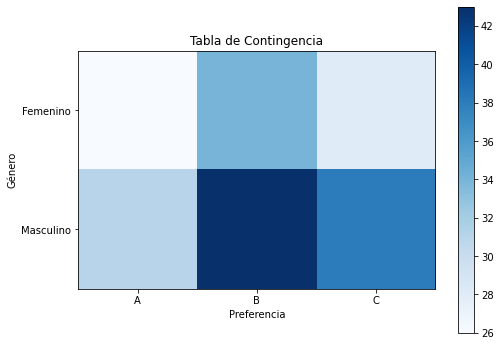

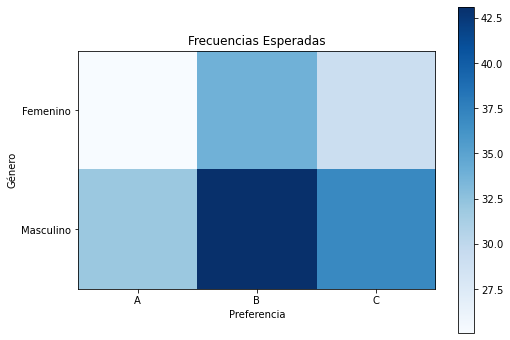

No se puede rechazar la hipótesis nula


In [15]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Crear datos ficticios para dos variables categóricas
# En este ejemplo, se tiene una variable "Genero" (Masculino, Femenino)
# y una variable "Preferencia" (A, B, C)
genero = np.random.choice(["Masculino", "Femenino"], size=200)
preferencia = np.random.choice(["A", "B", "C"], size=200)

# Construir la tabla de contingencia
tabla_contingencia = pd.crosstab(genero, preferencia)

# Realizar la prueba de independencia chi-cuadrado
estadistico_chi2, p_valor, grados_libertad, frecuencias_esperadas = stats.chi2_contingency(tabla_contingencia)

# Imprimir los resultados
print("Estadístico chi-cuadrado:", estadistico_chi2)
print("Valor p:", p_valor)
print("Grados de libertad:", grados_libertad)
print("Frecuencias esperadas:", frecuencias_esperadas)

# Graficar la tabla de contingencia
plt.figure(figsize=(8, 6))
plt.imshow(tabla_contingencia, cmap="Blues")
plt.colorbar()
plt.xticks(np.arange(len(tabla_contingencia.columns)), tabla_contingencia.columns)
plt.yticks(np.arange(len(tabla_contingencia.index)), tabla_contingencia.index)
plt.xlabel("Preferencia")
plt.ylabel("Género")
plt.title("Tabla de Contingencia")
plt.show()

# Graficar las frecuencias esperadas
plt.figure(figsize=(8, 6))
plt.imshow(frecuencias_esperadas, cmap="Blues")
plt.colorbar()
plt.xticks(np.arange(len(tabla_contingencia.columns)), tabla_contingencia.columns)
plt.yticks(np.arange(len(tabla_contingencia.index)), tabla_contingencia.index)
plt.xlabel("Preferencia")
plt.ylabel("Género")
plt.title("Frecuencias Esperadas")
plt.show()

# Tomar la decisión
alfa = 0.05
if p_valor < alfa:
    print("Rechazar la hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula")

En este ejemplo, generamos datos ficticios para dos variables categóricas: "`Género`" y "`Preferencia`". Luego, construimos la tabla de contingencia utilizando la función `pd.crosstab()`. Posteriormente, utilizamos la función `stats.chi2_contingency()` para realizar la prueba de independencia chi-cuadrado. Esta función devuelve el estadístico chi-cuadrado, el valor `p`, los grados de libertad y las frecuencias esperadas.

Graficamos la tabla de contingencia y las frecuencias esperadas para visualizar las relaciones entre las categorías. Finalmente, imprimimos los resultados y tomamos una decisión basada en el valor `p` y el nivel de significancia.

Recuerda que la prueba de independencia chi-cuadrado asume ciertas condiciones, como el tamaño mínimo de las frecuencias esperadas y la independencia de las observaciones. Es importante considerar estas limitaciones y verificar si se cumplen los supuestos antes de interpretar los resultados de la prueba.

| **Inicio** | **atrás 3** |
|----------- |-------------- |
| [🏠](../../../README.md) | [⏪](./3.ESTIMACION.ipynb)|